# PLOTNINE - GGPLOT

In [1]:
import pandas as pd

df = pd.read_table('iris.data', sep=',', header = None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 
              'petal_width', 'type']

# Primeras observaciones
df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Principales estadísticas
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# Filas x columnas
df.shape

(150, 5)

In [4]:
from plotnine import *

## Elementos básicos

Plotnine sique la misma filosofía que ggplot, es decir, trabajar en capas: primero definimos con la función <code>**ggplot**</code> el set de datos con el que trabajaremos y posteriormente iremos añadiendo más capas en las que incluiremos la variable o variables a mostrar, el tipo de gráfico, color, elementos estéticos como etiquetas, títulos, etc.

Mostramos un par de ejemplos básicos. Primero un histograma, solamente necesita un componente para poder mostrarse y, posteriormente una nube de puntos que necesita componentes x e y para poder visualizarse correctamente.

/Users/jaimegomez/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.


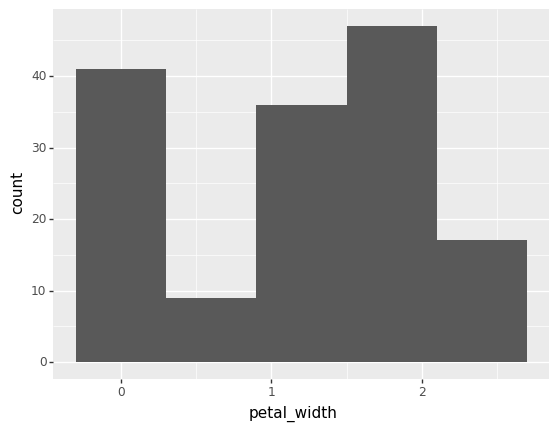

<ggplot: (8764034685236)>

In [5]:
(
    ggplot(df) +
     geom_histogram(aes(x='petal_width'))
)

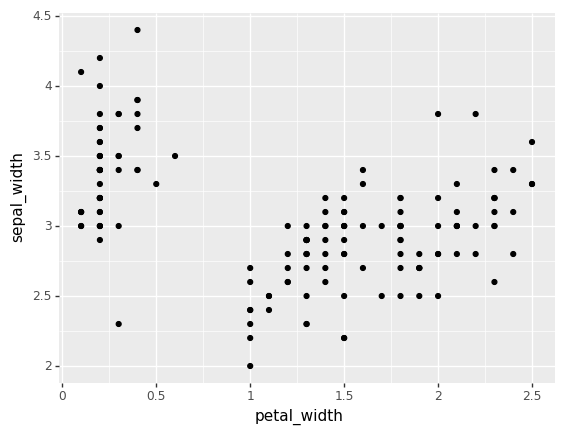

<ggplot: (8764034706056)>

In [6]:
(
    ggplot(df) +
     geom_point(aes(x='petal_width', y = 'sepal_width'))
)

## Modificando el color

Vemos que, si no especificamos nada, automáticamente toma los nombres de las variables como etiquetas x e y, probaremos a agregar color a las visualizaciones.

/Users/jaimegomez/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.


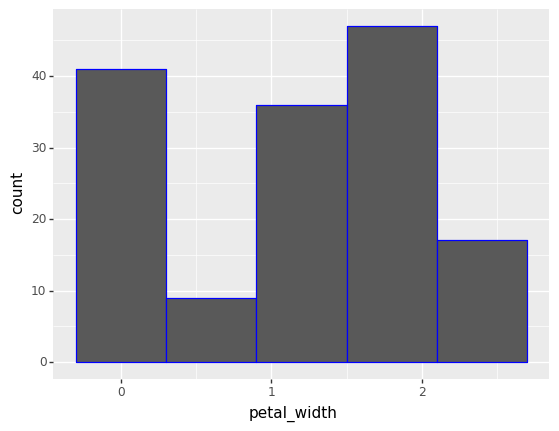

<ggplot: (8764015467132)>

In [7]:
(
    ggplot(df) +
     geom_histogram(aes(x='petal_width'), color = 'blue')
)

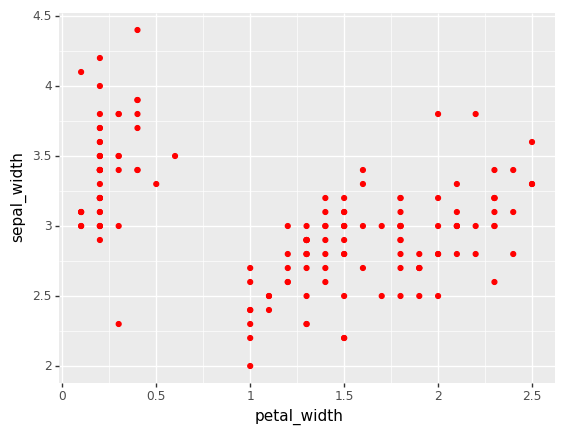

<ggplot: (8764068324605)>

In [8]:
(
    ggplot(df) +
     geom_point(aes(x='petal_width', y = 'sepal_width'), color = 'red')
)

Vemos que el efecto en el histograma no es el deseado, ya que toma por defecto el parámetro color el borde del histograma, en este caso tenemos que tener cuidado, cuando haya dos componentes diferentes de color existirán al menos: **color** y **fill**.

/Users/jaimegomez/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.


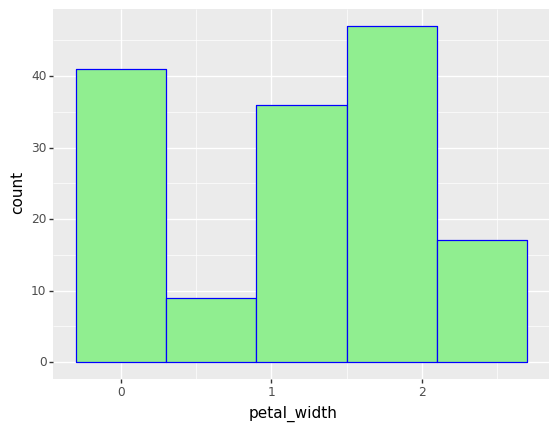

<ggplot: (8764034825334)>

In [9]:
(
    ggplot(df) +
     geom_histogram(aes(x='petal_width'), color = 'blue', 
                    fill = 'lightgreen')
)

## Parámetros de una capa

Del mismo modo, podemos encontrar aún más elementos estéticos dentro de la capa histograma.

/Users/jaimegomez/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.


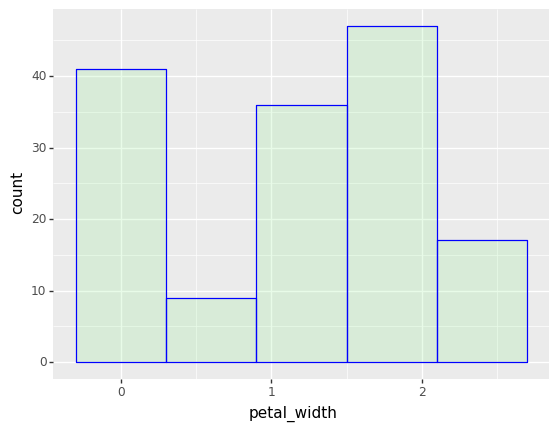

<ggplot: (8763998848449)>

In [10]:
(
    ggplot(df) +
     geom_histogram(aes(x='petal_width'), 
                    color = 'blue', 
                    fill = 'lightgreen', 
                    alpha = 0.2, 
                    linetype='solid')
)

/Users/jaimegomez/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.


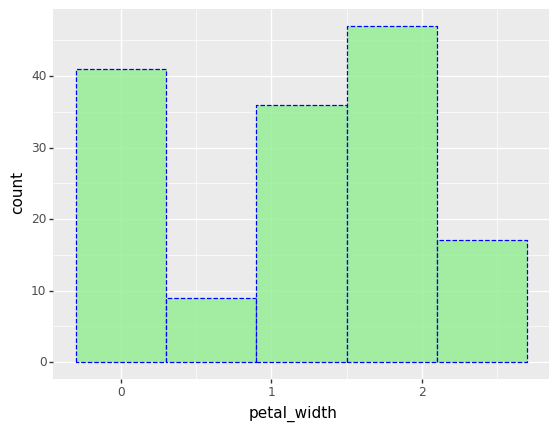

<ggplot: (8764015653593)>

In [11]:
(
    ggplot(df) +
     geom_histogram(aes(x='petal_width'), 
                    color = 'blue', 
                    fill = 'lightgreen', 
                    alpha = 0.8, 
                    linetype='dashed')
)


## Añadiendo texto

Para agregar elementos textuales a una visualización, también utilizaremos nuevas, en este caso <code>**labs**</code>, que podemos agregarle algunos elementos:
* title
* x
* y
* color (sólo cuando hay disponible leyenda).


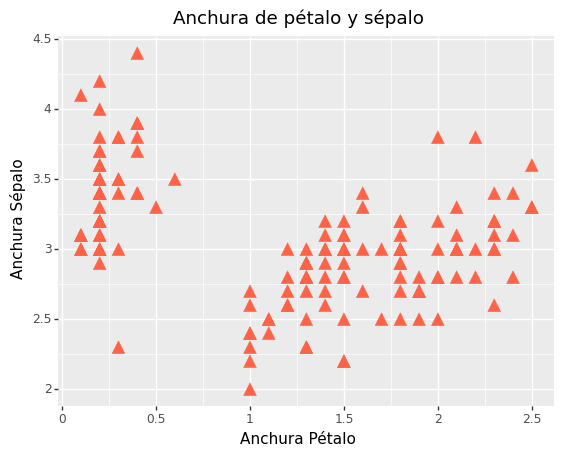

<ggplot: (8763999012199)>

In [12]:
(
    ggplot(df) +
     geom_point(aes(x='petal_width', y = 'sepal_width'), 
                color = 'tomato',
               alpha=1,
               shape='^',
               size = 5,
               stroke = 0.2) +
    labs(title='Anchura de pétalo y sépalo', 
         x = 'Anchura Pétalo',
         y = 'Anchura Sépalo')
)


## Categorías como color

Una vez vistos los principales elementos descriptivos que podemos agregar a una gráfica, mostraremos cómo mostrar gradientes de color o cómo mostrar una gráfica en base a una etiqueta o variable categórica. En este caso, tenemos la variable 'type'

In [13]:
df['type'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Nos devuelve tres tipos diferentes, por lo que podemos mostrar cualquier observación de nuestro dataset en base a qué tipo representa. Cuando queramos representar el color en base a una variable categórica, tenemos que mover el parámetro <code>**color**</code> dentro de la capa aesthetics (aes)

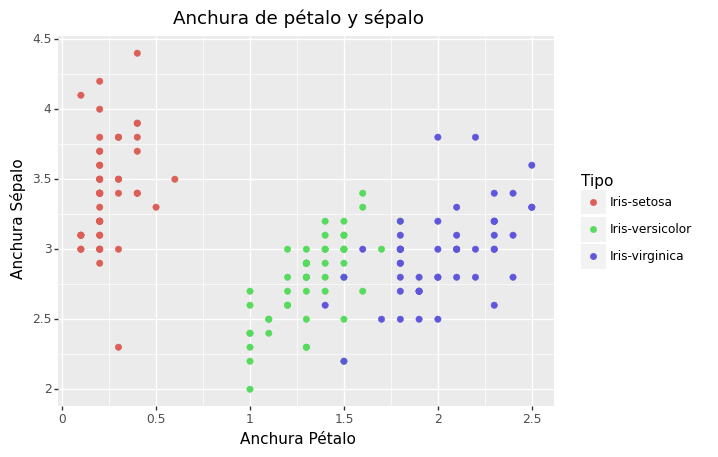

<ggplot: (8764068589782)>

In [14]:
(
    ggplot(df) +
     geom_point(aes(x='petal_width', y = 'sepal_width', color = 'type'),
               alpha=1,
               shape='.',
               size = 5,
               stroke = 0.2) +
    labs(title='Anchura de pétalo y sépalo', 
         x = 'Anchura Pétalo',
         y = 'Anchura Sépalo',
         color = 'Tipo') #Solo cuando hay disponible una leyenda
)


Otro gráfico interesante, es el diagrama de barras, para realizarlo, simplemente añadimos como capa <code>**geom_bar**</code>

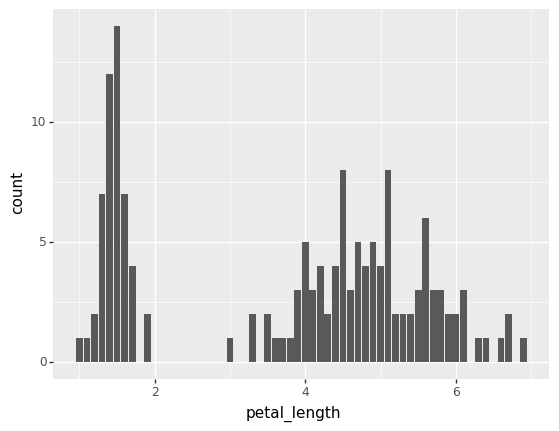

<ggplot: (8764068167810)>

In [15]:
(ggplot(df)         
 + aes(x='petal_length')   
 + geom_bar() 
)

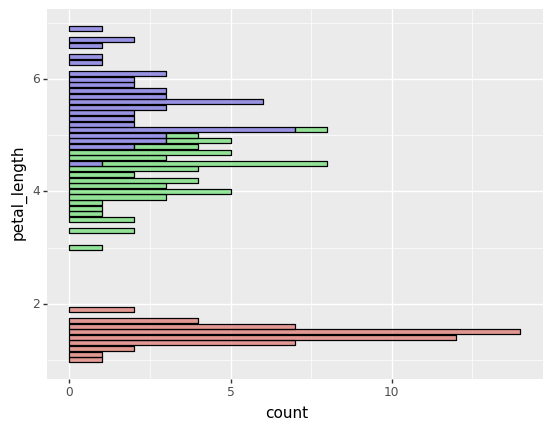

<ggplot: (8763981470127)>

In [16]:
(ggplot(df)         
 + aes(x='petal_length', fill = 'type')   
 + geom_bar(color = 'black', alpha = 0.6, show_legend=False) 
 + coord_flip() 
)

## Estadísticas en los gráficos

Otra funcionalidad interesante es la mostrar estadísticas en las visualizaciones. Para ello existen principalmente dos funciones para mostrar líneas verticales u horizontales en función de un parámetro estadístico:
* <code>**geom_vline**</code> recibe como parámetro **xintercept**
* <code>**geom_hline**</code> recibe como parámetro **yintercept**

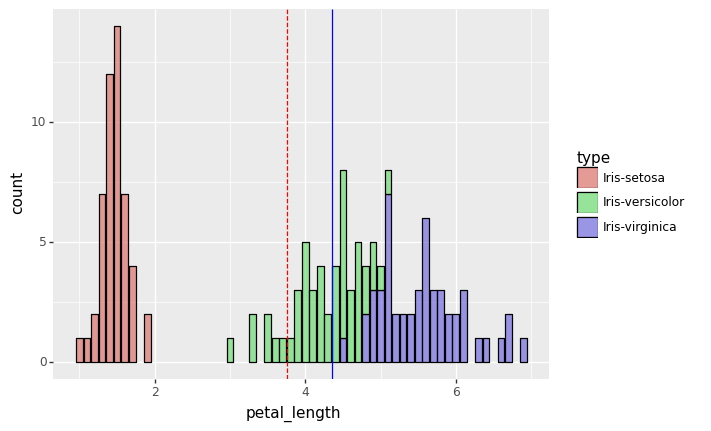

<ggplot: (8763999010094)>

In [17]:
(ggplot(df)         
 + aes(x='petal_length', fill = 'type')   
 + geom_bar(color = 'black', alpha = 0.6, show_legend=True) 
 + geom_vline(aes(xintercept = df.petal_length.mean()), color = 'red',
             linetype = 'dashed')
  + geom_vline(aes(xintercept = df.petal_length.median()), color = 'blue',
             linetype = 'solid')

)

## Un gráfico por categoría.

Uno de los elementos más potentes de ggplot es la capacidad de generar tantos gráficos de una variable como categorías tenga la variable que queramos explicar, esto es lo que se conoce como facet wraps, para ello utilizamos una función con el mismo nombre que recibirá como parámetro el número de categorías <code>**facet_wrap**</code>

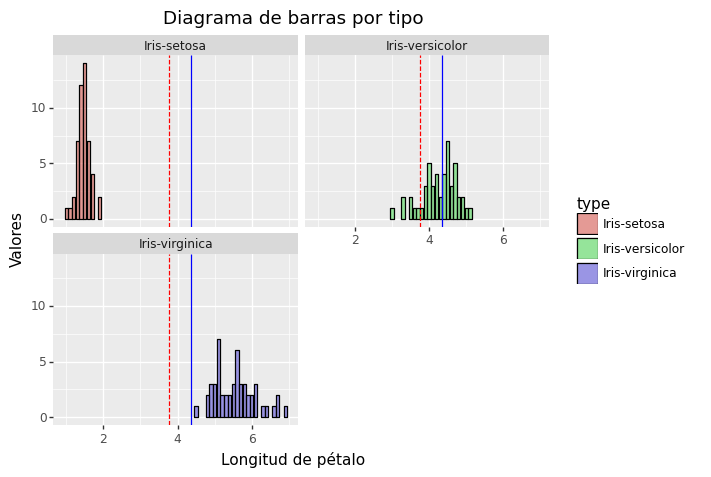

<ggplot: (8763964666131)>

In [18]:
(ggplot(df)         
 + aes(x='petal_length', fill = 'type')   
 + geom_bar(color = 'black', alpha = 0.6, show_legend=True) 
  + geom_vline(aes(xintercept = df.petal_length.mean()), color = 'red',
             linetype = 'dashed')
  + geom_vline(aes(xintercept = df.petal_length.median()), color = 'blue',
             linetype = 'solid')
 + facet_wrap('~type', ncol = 2)
 + labs(
     x = 'Longitud de pétalo',
     y = 'Valores',
     title = 'Diagrama de barras por tipo'
 )
 

)

## Añadiendo regresión lineal entre variables

Ya hemos visto cómo crear nubes de puntos. Desde ggplot, también existe la posibilidad de incluir en la misma gráfica una recta de ajuste y su *smooth*, esto lo realizamos a través de una nueva capa <code>**geom_smooth**</code>

En esta gráfica además mostraremos cómo añadir un gradiente de color mediante el comando **fill**, en este caso en lugar de una variable categórica, utilizaremos una continua.

/Users/jaimegomez/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


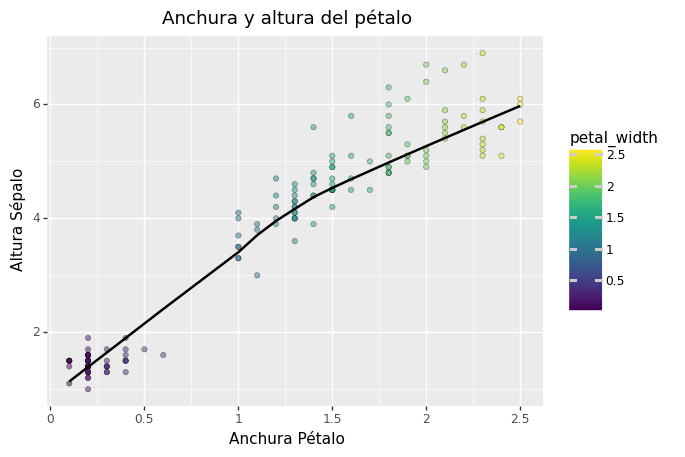

<ggplot: (8764068328078)>

In [19]:
(
    ggplot(df) +
     geom_point(aes(x='petal_width', y = 'petal_length', 
                    fill = 'petal_width'),
               alpha=0.5,
               shape='o',
               size = 2,
               stroke = 0.2) 
    + geom_smooth(
        aes(x='petal_width', y = 'petal_length')
    )
    + labs(title='Anchura y altura del pétalo', 
         x = 'Anchura Pétalo',
         y = 'Altura Sépalo')
)


Al igual que en variables categóricas podemos hacer *facetting*

/Users/jaimegomez/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_smooth.py:203: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/jaimegomez/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_smooth.py:203: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/jaimegomez/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_smooth.py:203: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Users/jaimegomez/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_smooth.py:203: PlotnineWarning: Smoothing requires 2 or more poin

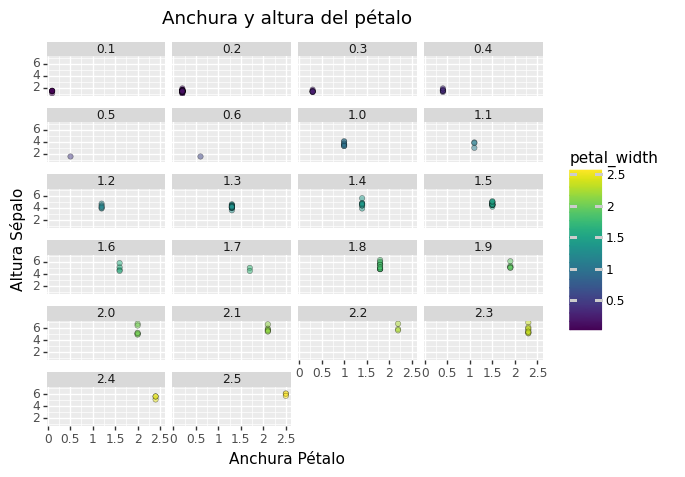

<ggplot: (8764033121847)>

In [20]:
(
    ggplot(df) +
     geom_point(aes(x='petal_width', y = 'petal_length', fill = 'petal_width'),
               alpha=0.5,
               shape='o',
               size = 2,
               stroke = 0.2) 
    + geom_smooth(
        aes(x='petal_width', y = 'petal_length')
    )
    + labs(title='Anchura y altura del pétalo', 
         x = 'Anchura Pétalo',
         y = 'Altura Sépalo')
    + facet_wrap('~petal_width', ncol = 4)
)


## Diagrama de caja y bigotes

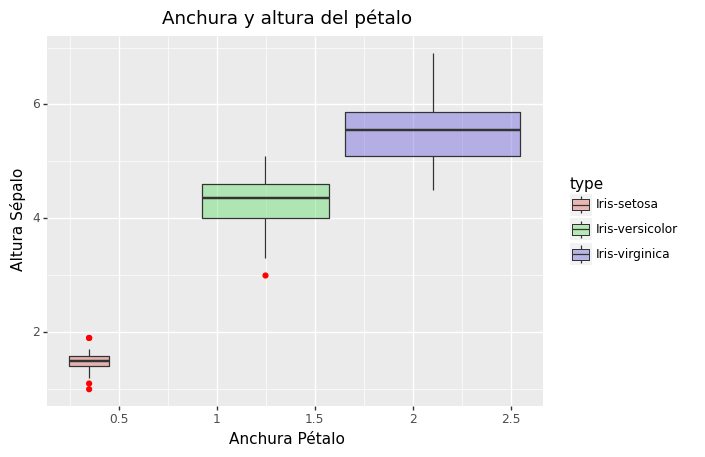

<ggplot: (8764015472884)>

In [21]:
(
    ggplot(df) 
    + geom_boxplot(
        aes(x='petal_width', y = 'petal_length', fill = 'type'),  
        alpha=0.4, 
        outlier_alpha = 1, 
        outlier_color ='red'
     )
    + labs(title='Anchura y altura del pétalo', 
         x = 'Anchura Pétalo',
         y = 'Altura Sépalo',
         color = 'Ancho Pétalo')
)
